In [1]:
import zipfile
from pathlib import Path

zip_dir = Path('data/jpegs/THLAR')

#unpacking the zip files
for zip_path in zip_dir.glob('*.zip'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        extract_path = zip_path.with_suffix('')  # Remove '.zip' suffix for extraction folder
        extract_path.mkdir(exist_ok=True)       # Create directory if it doesn't exist
        zip_ref.extractall(extract_path)
        print(f'Extracted {zip_path.name} to {extract_path}')

Extracted 118936.zip to data/jpegs/THLAR/118936
Extracted 118922.zip to data/jpegs/THLAR/118922
Extracted 118923.zip to data/jpegs/THLAR/118923
Extracted 118937.zip to data/jpegs/THLAR/118937
Extracted 118909.zip to data/jpegs/THLAR/118909
Extracted 118934.zip to data/jpegs/THLAR/118934
Extracted 118920.zip to data/jpegs/THLAR/118920
Extracted 118924.zip to data/jpegs/THLAR/118924
Extracted 118919.zip to data/jpegs/THLAR/118919
Extracted 118931.zip to data/jpegs/THLAR/118931
Extracted 118925.zip to data/jpegs/THLAR/118925
Extracted 118927.zip to data/jpegs/THLAR/118927
Extracted 118926.zip to data/jpegs/THLAR/118926
Extracted 118932.zip to data/jpegs/THLAR/118932
Extracted 118945.zip to data/jpegs/THLAR/118945
Extracted 118801.zip to data/jpegs/THLAR/118801
Extracted 118803.zip to data/jpegs/THLAR/118803
Extracted 118802.zip to data/jpegs/THLAR/118802
Extracted 118804.zip to data/jpegs/THLAR/118804
Extracted 118917.zip to data/jpegs/THLAR/118917
Extracted 118903.zip to data/jpegs/THLAR

In [2]:
#deleting the zip files

for zip_path in zip_dir.glob('*.zip'):
    try:
        os.remove(zip_path)  # Delete the ZIP file
        print(f"Deleted: {zip_path}")
    except Exception as e:
        print(f"Error deleting {zip_path}: {e}")

Deleted: data/jpegs/THLAR/118936.zip
Deleted: data/jpegs/THLAR/118922.zip
Deleted: data/jpegs/THLAR/118923.zip
Deleted: data/jpegs/THLAR/118937.zip
Deleted: data/jpegs/THLAR/118909.zip
Deleted: data/jpegs/THLAR/118934.zip
Deleted: data/jpegs/THLAR/118920.zip
Deleted: data/jpegs/THLAR/118924.zip
Deleted: data/jpegs/THLAR/118919.zip
Deleted: data/jpegs/THLAR/118931.zip
Deleted: data/jpegs/THLAR/118925.zip
Deleted: data/jpegs/THLAR/118927.zip
Deleted: data/jpegs/THLAR/118926.zip
Deleted: data/jpegs/THLAR/118932.zip
Deleted: data/jpegs/THLAR/118945.zip
Deleted: data/jpegs/THLAR/118801.zip
Deleted: data/jpegs/THLAR/118803.zip
Deleted: data/jpegs/THLAR/118802.zip
Deleted: data/jpegs/THLAR/118804.zip
Deleted: data/jpegs/THLAR/118917.zip
Deleted: data/jpegs/THLAR/118903.zip
Deleted: data/jpegs/THLAR/118902.zip
Deleted: data/jpegs/THLAR/118916.zip
Deleted: data/jpegs/THLAR/118928.zip
Deleted: data/jpegs/THLAR/118914.zip
Deleted: data/jpegs/THLAR/118915.zip
Deleted: data/jpegs/THLAR/118901.zip
D

# Performance Measurment of Classification/Segmentation Based on Plant Growth Stage

In order to evaluate the performance of classification and segmentation based on plant growth, we neet metrics that account for both accuracy and biological growth progression. 

A few approaches:

1. Growth-Aware Evaluation Metrics
- Stage-Based Accuracy -> Evaluate the model per growth stage. 
    - Train/Test the model on early, mid and late growth phases seperately. 
    - Compute Accuracy within each phase and compare performance.

    Note that misclassifying an early stage plant could weigh differently, based on the fact that it is harder. Intersting to think about.

2. Temporal Consistency for Segmentation

- IoU (Intersection over Union) Over Time -> Measure the segementation accuracy over time. This can be done by computing the union between predicted masks and ground truth each step, after analyze how the performance changes as the plant grows. 

3. Simple -> Prediction vs Actual growth rate. Measure whether the predicted growth aligns with observed growth. 

Initial Model Architecture for Growth Prediction

Your project aims to predict plant growth from images over time. A strong model should:
	•	Process temporal data (multiple images over time).
	•	Extract spatial features (leaf structure, size, etc.).
	•	Predict future growth trends based on historical data.

Suggested Architecture (CNN + LSTM Hybrid Model)

A combination of Convolutional Neural Networks (CNNs) for feature extraction and Long Short-Term Memory (LSTM) networks for temporal modeling can be effective.

Model Architecture:
1. CNN Backbone (ResNet or EfficientNet)
   - Extracts spatial features from images (leaves, structure, size)
   - Outputs feature maps

2. LSTM/GRU (Time-Series Component)
   - Takes sequential feature maps as input
   - Captures temporal dependencies in plant growth
   - Outputs growth predictions (classification or mask regression)

3. Fully Connected (FC) Layer
   - Maps LSTM output to final predictions (growth stage, size, or segmentation masks)

4. Output
   - For classification: Softmax (growth stage prediction)
   - For segmentation: U-Net decoder for mask generation
   - For growth rate prediction: Regression layer (continuous growth estimation)

GAN-Based Future Growth Prediction
	•	Use a Generative Adversarial Network (GAN) to predict future plant images based on past growth.
	•	Train the GAN with historical plant images so it learns how plants evolve.
	•	Use Pix2Pix or CycleGAN for predicting the next growth stage.

In [8]:
from pathlib import Path
import cv2
import numpy as np

# === CONFIG ===
INPUT_ROOT = Path("data/jpegs/THLAR")
OUTPUT_ROOT = Path("resized_THLAR")
RESIZE_SHAPE = (224, 224)  # (width, height) for OpenCV

OUTPUT_ROOT.mkdir(parents=True, exist_ok=True)

for folder in INPUT_ROOT.iterdir():
    if folder.is_dir():
        output_folder = OUTPUT_ROOT / folder.name
        output_folder.mkdir(parents=True, exist_ok=True)

        image_files = list(folder.glob("*/*.jpg")) + list(folder.glob("*/*.jpeg"))
        print(f"\nProcessing folder: {folder.name} | Found {len(image_files)} images")

        for img_file in sorted(image_files):
            print(f"Reading: {img_file.name}")
            try:
                img = cv2.imread(str(img_file))
                if img is None or img.size == 0:
                    print(f"Failed to read image: {img_file}")
                    continue

                resized_img = cv2.resize(img, RESIZE_SHAPE)  # BGR, uint8
                save_path = output_folder / f"{img_file.stem}.jpg"
                success = cv2.imwrite(str(save_path), resized_img)

                if success:
                    print(f"Saved: {save_path}")
                else:
                    print(f"Failed to save: {save_path}")

            except Exception as e:
                print(f"ERROR processing {img_file.name}: {e}")


Processing folder: 118802 | Found 63 images
→ Reading: THLAR_118802_2021Y06M29D_20H50M59S_img.jpeg
✅ Saved: resized_THLAR/118802/THLAR_118802_2021Y06M29D_20H50M59S_img.jpg
→ Reading: THLAR_118802_2021Y06M30D_20H25M44S_img.jpeg
✅ Saved: resized_THLAR/118802/THLAR_118802_2021Y06M30D_20H25M44S_img.jpg
→ Reading: THLAR_118802_2021Y07M01D_20H06M38S_img.jpeg
✅ Saved: resized_THLAR/118802/THLAR_118802_2021Y07M01D_20H06M38S_img.jpg
→ Reading: THLAR_118802_2021Y07M02D_10H16M33S_img.jpeg
✅ Saved: resized_THLAR/118802/THLAR_118802_2021Y07M02D_10H16M33S_img.jpg
→ Reading: THLAR_118802_2021Y07M02D_13H47M34S_img.jpeg
✅ Saved: resized_THLAR/118802/THLAR_118802_2021Y07M02D_13H47M34S_img.jpg
→ Reading: THLAR_118802_2021Y07M05D_07H33M14S_img.jpeg
✅ Saved: resized_THLAR/118802/THLAR_118802_2021Y07M05D_07H33M14S_img.jpg
→ Reading: THLAR_118802_2021Y07M05D_13H51M01S_img.jpeg
✅ Saved: resized_THLAR/118802/THLAR_118802_2021Y07M05D_13H51M01S_img.jpg
→ Reading: THLAR_118802_2021Y07M05D_18H31M16S_img.jpeg
✅ Sa

In [ ]:
from pathlib import Path

resized_root = Path("resized_THLAR")

folder_counts = {}

for folder in resized_root.iterdir():
    if folder.is_dir():
        count = len(list(folder.glob("*.jpg")))
        folder_counts[folder.name] = count

# Print the results
for folder_name, count in sorted(folder_counts.items()):
    print(f"{folder_name}: {count} images")

# Optional: Total count
total = sum(folder_counts.values())
print(f"\n Total images: {total}")


118801: 37 images
118802: 63 images
118803: 76 images
118804: 95 images
118901: 95 images
118902: 51 images
118903: 51 images
118904: 76 images
118905: 96 images
118906: 41 images
118907: 99 images
118909: 147 images
118910: 83 images
118911: 77 images
118912: 100 images
118913: 107 images
118914: 93 images
118915: 176 images
118916: 94 images
118917: 77 images
118919: 200 images
118920: 208 images
118922: 205 images
118923: 75 images
118924: 72 images
118925: 66 images
118926: 60 images
118927: 208 images
118928: 141 images
118929: 154 images
118931: 142 images
118932: 129 images
118934: 71 images
118936: 97 images
118937: 150 images
118938: 166 images
118939: 63 images
118945: 65 images

🧮 Total images: 4006


=================================================
CODE MODEL TRAINING
=================================================

In [1]:
import os
import re
import ast
import torch
import random
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence

# === CONFIG ===
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

IMAGE_ROOT = Path("resized_THLAR")
IMAGE_SIZE = 224
SEQ_LEN = None  # leave as None to allow variable length
TRAIN_CSV = "train_metadata.csv"
TEST_CSV = "test_metadata.csv"
MODEL_PATH = "trained_model.pth"
BATCH_SIZE = 4
NUM_EPOCHS = 10
LR = 1e-4

In [2]:
# === Step 1: Build metadata from image folders ===
def parse_filename(filename):
    match = re.match(r'THLAR_(\d+)_(\d{4})Y(\d{2})M(\d{2})D_(\d{2})H(\d{2})M(\d{2})S', filename)
    if match:
        plant_id, y, m, d, H, M, S = match.groups()
        timestamp = datetime(int(y), int(m), int(d), int(H), int(M), int(S))
        return plant_id, timestamp
    return None, None

records = []
for folder in IMAGE_ROOT.iterdir():
    if folder.is_dir():
        imgs = sorted(folder.glob("*.jpg"))
        parsed = []
        for img in imgs:
            pid, ts = parse_filename(img.stem)
            if pid and ts:
                parsed.append((img, ts))
        if len(parsed) < 4:
            continue
        parsed.sort(key=lambda x: x[1])
        first_ts, last_ts = parsed[0][1], parsed[-1][1]
        total_days = (last_ts - first_ts).days + 1
        cutoff_date = parsed[0][1] + pd.Timedelta(days=15)
        early_imgs = [str(p[0]) for p in parsed if p[1] <= cutoff_date]
        records.append({
            "plant_id": folder.name,
            "input_images": early_imgs,
            "total_growth_days": total_days
        })

df = pd.DataFrame(records)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=SEED)
train_df.to_csv(TRAIN_CSV, index=False)
test_df.to_csv(TEST_CSV, index=False)
print(f"Metadata ready: {len(train_df)} train / {len(test_df)} test")

Metadata ready: 30 train / 8 test


In [3]:
# === Step 2: Dataset ===
class PlantGrowthDataset(Dataset):
    def __init__(self, csv_path, image_size=224):
        self.df = pd.read_csv(csv_path)
        self.df['input_images'] = self.df['input_images'].apply(ast.literal_eval)
        self.transform = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])
        ])
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        images = []
        for img_path in row["input_images"]:
            img = Image.open(img_path).convert("RGB")
            img = self.transform(img)
            images.append(img)
        sequence = torch.stack(images)  # [T, C, H, W]
        label = torch.tensor(row["total_growth_days"], dtype=torch.float32)
        return sequence, label


In [4]:
# === Step 3: Collate function for variable length
def collate_fn(batch):
    sequences, targets = zip(*batch)
    lengths = [s.shape[0] for s in sequences]
    padded = pad_sequence(sequences, batch_first=True)  # [B, T_max, C, H, W]
    return padded, torch.tensor(lengths), torch.tensor(targets, dtype=torch.float32)

In [5]:
# === Step 4: Model
class GrowthRegressor(nn.Module):
    def __init__(self, cnn_out_dim=512, rnn_hidden=256):
        super().__init__()
        base_cnn = models.resnet18(pretrained=True)
        base_cnn.fc = nn.Identity()
        self.cnn = base_cnn

        self.rnn = nn.LSTM(input_size=cnn_out_dim, hidden_size=rnn_hidden, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(rnn_hidden, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x, lengths):
        B, T, C, H, W = x.shape
        x = x.view(B * T, C, H, W)
        feats = self.cnn(x)  # [B*T, F]
        feats = feats.view(B, T, -1)

        packed = pack_padded_sequence(feats, lengths.cpu(), batch_first=True, enforce_sorted=False)
        _, (hn, _) = self.rnn(packed)
        out = self.fc(hn.squeeze(0))
        return out.squeeze(1)


In [6]:
# === Step 5: Train
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GrowthRegressor().to(device)

train_ds = PlantGrowthDataset(TRAIN_CSV)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

optimizer = torch.optim.Adam(model.parameters(), lr=LR)
loss_fn = nn.MSELoss()

print("Starting training...")
for epoch in range(NUM_EPOCHS):
    model.train()
    total_loss = 0
    for x, lengths, y in tqdm(train_dl):
        x, y = x.to(device), y.to(device)
        preds = model(x, lengths)
        loss = loss_fn(preds, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | Loss: {total_loss/len(train_dl):.4f}")

torch.save(model.state_dict(), MODEL_PATH)
print("Model saved.")

Starting training...


/Users/mabhatti/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/mabhatti/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 8/8 [00:46<00:00,  5.87s/it]


Epoch 1/10 | Loss: 3318.3302


100%|██████████| 8/8 [00:48<00:00,  6.04s/it]


Epoch 2/10 | Loss: 3060.9793


100%|██████████| 8/8 [00:51<00:00,  6.47s/it]


Epoch 3/10 | Loss: 3111.6387


100%|██████████| 8/8 [00:50<00:00,  6.28s/it]


Epoch 4/10 | Loss: 2834.1525


100%|██████████| 8/8 [00:53<00:00,  6.67s/it]


Epoch 5/10 | Loss: 2765.2688


100%|██████████| 8/8 [00:48<00:00,  6.12s/it]


Epoch 6/10 | Loss: 2889.3747


100%|██████████| 8/8 [00:54<00:00,  6.80s/it]


Epoch 7/10 | Loss: 2641.9843


100%|██████████| 8/8 [00:50<00:00,  6.28s/it]


Epoch 8/10 | Loss: 2836.5173


100%|██████████| 8/8 [00:52<00:00,  6.58s/it]


Epoch 9/10 | Loss: 2522.3417


100%|██████████| 8/8 [00:57<00:00,  7.18s/it]

Epoch 10/10 | Loss: 2508.8750
Model saved.


/var/folders/px/hcyk6qjs6hj0k5x4mb8p8vqm0000gn/T/ipykernel_69352/2351848876.py:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/px/hcyk6qjs6hj0k5x4mb8p8vqm0000gn/T/ipykernel_69352/2351848876.py:23: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("prediction_vs_actual.png")
/Users/mabhatti/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


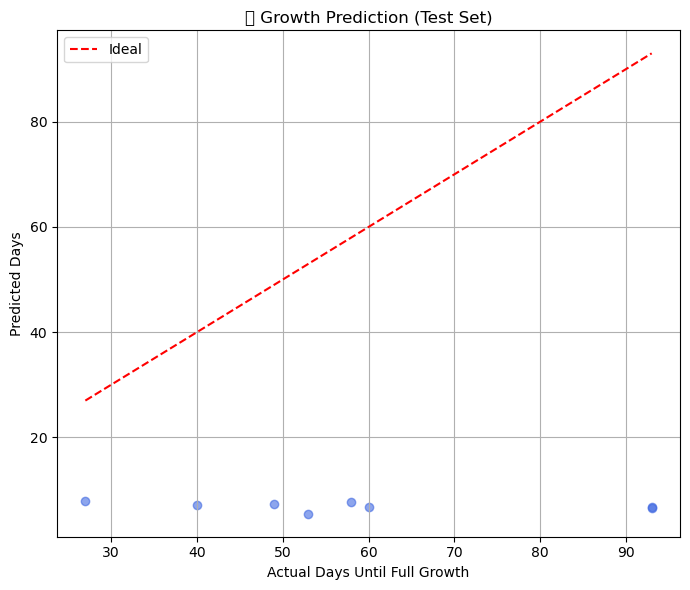

In [7]:

# === Step 6: Inference & Plot
model.eval()
test_ds = PlantGrowthDataset(TEST_CSV)
test_dl = DataLoader(test_ds, batch_size=1, shuffle=False, collate_fn=collate_fn)

preds, targets = [], []
with torch.no_grad():
    for x, lengths, y in test_dl:
        x = x.to(device)
        pred = model(x, lengths).cpu().item()
        preds.append(pred)
        targets.append(y.item())

plt.figure(figsize=(7, 6))
plt.scatter(targets, preds, color="royalblue", alpha=0.6)
plt.plot([min(targets), max(targets)], [min(targets), max(targets)], 'r--', label="Ideal")
plt.xlabel("Actual Days Until Full Growth")
plt.ylabel("Predicted Days")
plt.title("📈 Growth Prediction (Test Set)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("prediction_vs_actual.png")
plt.show()


7. How sensitive is growth prediction to image resolution, lighting, or background noise?
	•	What happens when image quality varies or camera conditions change?

6. How well can a vision-based model approximate traditional plant growth measurement (e.g., size, area, biomass)?
	•	Can the model substitute for manual measurement in early growth stages?

Starting training...


100%|██████████| 8/8 [01:05<00:00,  8.18s/it]


Epoch 1/20 | Loss: 3.0117


100%|██████████| 8/8 [01:11<00:00,  8.88s/it]


Epoch 2/20 | Loss: 2.7183


100%|██████████| 8/8 [01:15<00:00,  9.46s/it]


Epoch 3/20 | Loss: 2.1320


100%|██████████| 8/8 [01:23<00:00, 10.49s/it]


Epoch 4/20 | Loss: 1.3011


100%|██████████| 8/8 [01:22<00:00, 10.25s/it]


Epoch 5/20 | Loss: 0.2983


100%|██████████| 8/8 [01:28<00:00, 11.09s/it]


Epoch 6/20 | Loss: 0.1972


100%|██████████| 8/8 [01:26<00:00, 10.82s/it]


Epoch 7/20 | Loss: 0.2071


100%|██████████| 8/8 [01:26<00:00, 10.77s/it]


Epoch 8/20 | Loss: 0.1753


100%|██████████| 8/8 [01:22<00:00, 10.25s/it]


Epoch 9/20 | Loss: 0.1213


100%|██████████| 8/8 [01:23<00:00, 10.46s/it]


Epoch 10/20 | Loss: 0.1490


100%|██████████| 8/8 [01:22<00:00, 10.36s/it]


Epoch 11/20 | Loss: 0.1399


100%|██████████| 8/8 [01:22<00:00, 10.36s/it]


Epoch 12/20 | Loss: 0.1403


100%|██████████| 8/8 [01:22<00:00, 10.36s/it]


Epoch 13/20 | Loss: 0.1641


100%|██████████| 8/8 [01:22<00:00, 10.34s/it]


Epoch 14/20 | Loss: 0.1367


100%|██████████| 8/8 [01:24<00:00, 10.50s/it]


Epoch 15/20 | Loss: 0.1604


100%|██████████| 8/8 [01:23<00:00, 10.47s/it]


Epoch 16/20 | Loss: 0.0959


100%|██████████| 8/8 [01:24<00:00, 10.61s/it]


Epoch 17/20 | Loss: 0.1235


100%|██████████| 8/8 [01:23<00:00, 10.41s/it]


Epoch 18/20 | Loss: 0.1409


100%|██████████| 8/8 [01:22<00:00, 10.36s/it]


Epoch 19/20 | Loss: 0.1321


100%|██████████| 8/8 [01:23<00:00, 10.41s/it]

Epoch 20/20 | Loss: 0.1175
Model saved.


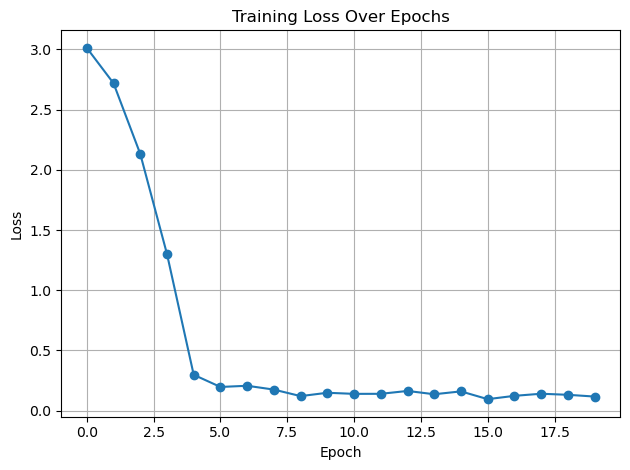

/var/folders/px/hcyk6qjs6hj0k5x4mb8p8vqm0000gn/T/ipykernel_69352/396735405.py:216: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/px/hcyk6qjs6hj0k5x4mb8p8vqm0000gn/T/ipykernel_69352/396735405.py:217: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("prediction_vs_actual.png")
/Users/mabhatti/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


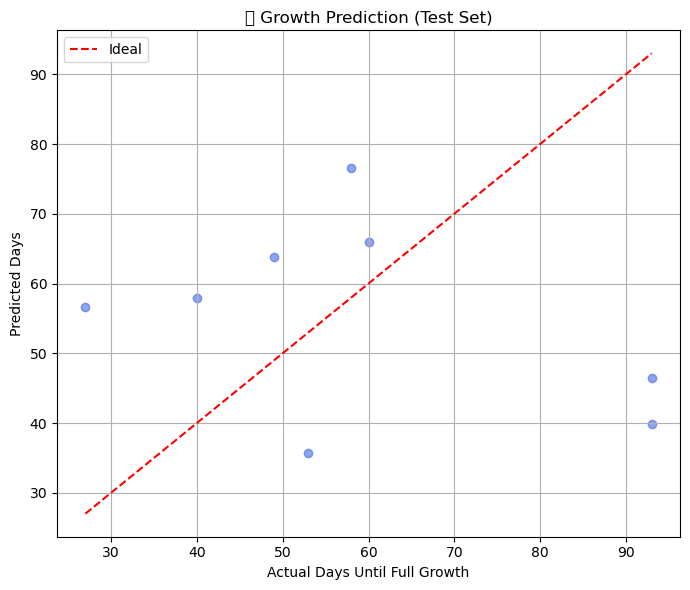

In [11]:
# Full implementation (enhanced) with EfficientNet, quantile loss, LR scheduler, and extended training

import os
import re
import ast
import torch
import random
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime, timedelta
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence

# === CONFIG ===
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

IMAGE_ROOT = Path("resized_THLAR")
IMAGE_SIZE = 224
TRAIN_CSV = "train_metadata.csv"
TEST_CSV = "test_metadata.csv"
MODEL_PATH = "trained_model.pth"
BATCH_SIZE = 4
NUM_EPOCHS = 20
LR = 1e-4
MAX_SEQ_LEN = 15

# === Step 1: Build metadata from image folders ===
def parse_filename(filename):
    match = re.match(r'THLAR_(\d+)_(\d{4})Y(\d{2})M(\d{2})D_(\d{2})H(\d{2})M(\d{2})S', filename)
    if match:
        plant_id, y, m, d, H, M, S = match.groups()
        timestamp = datetime(int(y), int(m), int(d), int(H), int(M), int(S))
        return plant_id, timestamp
    return None, None

records = []
for folder in IMAGE_ROOT.iterdir():
    if folder.is_dir():
        imgs = sorted(folder.glob("*.jpg"))
        parsed = []
        for img in imgs:
            pid, ts = parse_filename(img.stem)
            if pid and ts:
                parsed.append((img, ts))
        if len(parsed) < 4:
            continue
        parsed.sort(key=lambda x: x[1])
        first_ts, last_ts = parsed[0][1], parsed[-1][1]
        total_days = (last_ts - first_ts).days + 1

        cutoff_date = first_ts + timedelta(days=15)
        early_imgs = [str(p[0]) for p in parsed if p[1] <= cutoff_date][:MAX_SEQ_LEN]

        if len(early_imgs) < 4:
            continue

        records.append({
            "plant_id": folder.name,
            "input_images": early_imgs,
            "total_growth_days": total_days
        })

# Save train/test splits
df = pd.DataFrame(records)
df["log_growth_days"] = np.log(df["total_growth_days"])
train_df, test_df = train_test_split(df, test_size=0.2, random_state=SEED)
train_df.to_csv(TRAIN_CSV, index=False)
test_df.to_csv(TEST_CSV, index=False)

# === Step 2: Dataset ===
class PlantGrowthDataset(Dataset):
    def __init__(self, csv_path, image_size=224):
        self.df = pd.read_csv(csv_path)
        self.df['input_images'] = self.df['input_images'].apply(ast.literal_eval)
        self.transform = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        images = []
        time_indices = []
        for i, img_path in enumerate(row["input_images"]):
            img = Image.open(img_path).convert("RGB")
            img = self.transform(img)
            images.append(img)
            time_indices.append(i / MAX_SEQ_LEN)
        sequence = torch.stack(images)  # [T, C, H, W]
        time_tensor = torch.tensor(time_indices).unsqueeze(1)  # [T, 1]
        label = torch.tensor(row["log_growth_days"], dtype=torch.float32)
        return sequence, time_tensor, label

# === Step 3: Collate function ===
def collate_fn(batch):
    sequences, time_idxs, targets = zip(*batch)
    lengths = [s.shape[0] for s in sequences]
    padded_seq = pad_sequence(sequences, batch_first=True)  # [B, T, C, H, W]
    padded_time = pad_sequence(time_idxs, batch_first=True)  # [B, T, 1]
    return padded_seq, padded_time, torch.tensor(lengths), torch.tensor(targets, dtype=torch.float32)

# === Step 4: Model with EfficientNet ===
class GrowthRegressor(nn.Module):
    def __init__(self, rnn_hidden=256):
        super().__init__()
        base_cnn = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
        self.feature_dim = base_cnn.classifier[1].in_features
        base_cnn.classifier = nn.Identity()
        self.cnn = base_cnn

        self.rnn = nn.LSTM(input_size=self.feature_dim + 1, hidden_size=rnn_hidden, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(rnn_hidden, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1)
        )

    def forward(self, x, time_emb, lengths):
        B, T, C, H, W = x.shape
        x = x.view(B * T, C, H, W)
        feats = self.cnn(x)  # [B*T, F]
        feats = feats.view(B, T, -1)
        feats = torch.cat([feats, time_emb.to(feats.device)], dim=2)

        packed = pack_padded_sequence(feats, lengths.cpu(), batch_first=True, enforce_sorted=False)
        _, (hn, _) = self.rnn(packed)
        out = self.fc(hn.squeeze(0))
        return out.squeeze(1)

# === Step 5: Quantile loss ===
def quantile_loss(pred, target, q=0.8):
    error = target - pred
    return torch.mean(torch.max(q * error, (q - 1) * error))

# === Step 6: Training ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GrowthRegressor().to(device)

train_ds = PlantGrowthDataset(TRAIN_CSV)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

print("Starting training...")
train_losses = []
for epoch in range(NUM_EPOCHS):
    model.train()
    total_loss = 0
    for x, t, lengths, y in tqdm(train_dl):
        x, t, y = x.to(device), t.to(device), y.to(device)
        preds = model(x, t, lengths)
        loss = quantile_loss(preds, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_dl)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | Loss: {avg_loss:.4f}")
    scheduler.step(avg_loss)

torch.save(model.state_dict(), MODEL_PATH)
print("Model saved.")

# Plot training loss
plt.figure()
plt.plot(train_losses, marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.savefig("training_loss.png")
plt.show()

# === Step 7: Evaluation ===
model.eval()
test_ds = PlantGrowthDataset(TEST_CSV)
test_dl = DataLoader(test_ds, batch_size=1, shuffle=False, collate_fn=collate_fn)

preds, targets = [], []
with torch.no_grad():
    for x, t, lengths, y in test_dl:
        x, t = x.to(device), t.to(device)
        pred = model(x, t, lengths).cpu().item()
        preds.append(np.exp(pred))
        targets.append(np.exp(y.item()))

plt.figure(figsize=(7, 6))
plt.scatter(targets, preds, color="royalblue", alpha=0.6)
plt.plot([min(targets), max(targets)], [min(targets), max(targets)], 'r--', label="Ideal")
plt.xlabel("Actual Days Until Full Growth")
plt.ylabel("Predicted Days")
plt.title("\U0001F4C8 Growth Prediction (Test Set)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("prediction_vs_actual.png")
plt.show()

